In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df=pd.read_csv("./train.csv/train.csv")
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,0,0,0,T,N,Red,Trapezoid,Snake,India,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1
299998,299998,0,1,0,F,Y,Green,Square,Axolotl,Costa Rica,...,ab0ce192b,1,Master,Boiling Hot,h,W,uJ,3,8,1


In [79]:
X=df.drop(['day','id','month','ord_3','ord_4','ord_5','nom_8','nom_9','nom_5','nom_6','nom_7','target'],axis=1)
y=df['target']
X

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,2,Grandmaster,Cold
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,1,Grandmaster,Hot
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,1,Expert,Lava Hot
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,1,Grandmaster,Boiling Hot
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,1,Grandmaster,Freezing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,1,Contributor,Freezing
299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,2,Novice,Freezing
299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,3,Novice,Boiling Hot
299998,0,1,0,F,Y,Green,Square,Axolotl,Costa Rica,Piano,1,Master,Boiling Hot


In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.50)


In [80]:
#finding optimal K
from kmodes.kmodes import KModes

costs=list()
for i in range(1,6):
    kmode=KModes(n_clusters=i,init='random',n_init=5,verbose=1)
    kmode.fit_predict(X)

    costs.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1940554.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1940554.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1940554.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1940554.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1940554.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 49392, cost: 1835224.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 51311, cost: 1806463.0
Init: initializing centroids
Init: initializing clust

Text(0.5, 1.0, 'Ideal cluster curve')

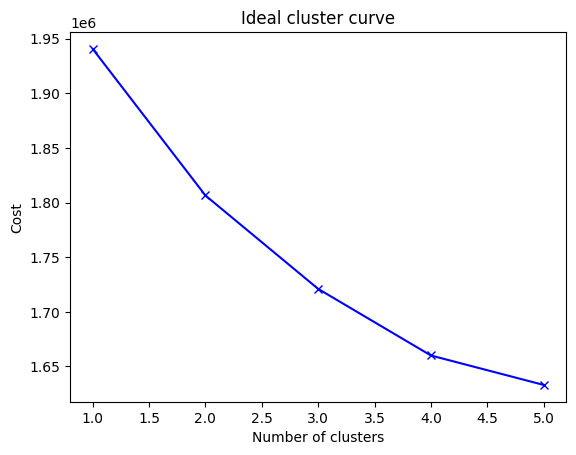

In [81]:
import matplotlib.pyplot as plt
plt.plot(range(1,6),costs,'bx-')
plt.xlabel("Number of clusters")
plt.ylabel('Cost')
plt.title("Ideal cluster curve")

In [58]:
#fitting clusters
kmode=KModes(n_clusters=2,init='random',n_init=5,verbose=1)
clusters=kmode.fit(x_train)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 45763, cost: 889829.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 36758, cost: 935283.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 32565, cost: 895648.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 22849, cost: 907897.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 38954, cost: 922153.0
Best run was number 1


In [59]:
from sklearn.metrics import accuracy_score
ypred=kmode.predict(x_train)
accuracy=accuracy_score(y_train,ypred)
accuracy

0.5571866666666667

In [63]:
#Consider labeled encoded features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(X['nom_0'])

X['nom_0']=le.transform(X['nom_0'])

le.fit(X['nom_1'])
X['nom_1']=le.transform(X['nom_1'])

le.fit(X['nom_2'])
X['nom_2']=le.transform(X['nom_2'])

le.fit(X['nom_3'])
X['nom_3']=le.transform(X['nom_3'])

le.fit(X['nom_4'])
X['nom_4']=le.transform(X['nom_4'])

le.fit(X['ord_1'])
X['ord_1']=le.transform(X['ord_1'])

le.fit(X['ord_2'])
X['ord_2']=le.transform(X['ord_2'])

le.fit(X['bin_3'])
X['bin_3']=le.transform(X['bin_3'])

le.fit(X['bin_4'])
X['bin_4']=le.transform(X['bin_4'])

In [64]:
X

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,ord_0,ord_1,ord_2
0,0,0,0,1,1,1,5,5,3,0,2,2,1
1,0,1,0,1,1,1,4,3,5,2,1,2,3
2,0,0,0,0,1,0,4,4,5,3,1,1,4
3,0,1,0,0,1,2,4,5,0,1,1,2,0
4,0,0,0,0,0,2,4,4,0,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,1,0,2,4,5,4,1,1,0,2
299996,0,0,0,0,1,1,4,4,5,2,2,4,2
299997,0,0,0,0,1,0,3,0,5,1,3,4,0
299998,0,1,0,0,1,1,2,0,2,2,1,3,0


In [76]:
#Train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.50)

In [77]:
#comparision with k means
from sklearn.cluster import KMeans
k=2
kmeans=KMeans(n_clusters=k,random_state=42)
kmeans.fit(x_train)



d:\uni-ML\kmodes-hierarichal\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [78]:
#Accuracy score
ypred=kmeans.predict(x_train)
ac=accuracy_score(ypred,y_train)
ac

0.46087333333333336